# Nettverksanalyse i sgis
https://github.com/statisticsnorway/ssb-sgis

Notebook-en kan kjøres i dapla.

Eller åpnes her: https://nbviewer.org/github/statisticsnorway/intro_til_geopandas/blob/main/nettverksanalyse.ipynb

In [1]:
# midlrertidig pga noen lokale endringer i pakka
import os
while "ssb-sgis" not in os.listdir():
    os.chdir("..")
os.chdir("ssb-sgis/src")
os.listdir()

['sgis']

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import sgis as sg

## Hente data

Henter data for veger og bygningspunkter i Oslo og to nabokommuner (Bærum og Nordre follo).

In [3]:
kartdata = "ssb-prod-kart-data-delt/kartdata_analyse/klargjorte-data"

veger = sg.read_geopandas(
    f"{kartdata}/2022/NVDB_ruteplan_nettverk_p20220703_v1.parquet",
    filters=[("KOMMUNENR", "in", ('0301', '3024', '3020'))]
     )

veger = veger[["oneway", "drivetime_fw", "drivetime_bw", "roadid", "KOMMUNENR", "geometry"]]

veger

,oneway,drivetime_fw,drivetime_bw,roadid,KOMMUNENR,geometry
119702,B,0.216611,0.216611,{S944},0301,MULTILINESTRING Z ((258028.440 6674249.890 413...
189106,B,0.087743,0.087743,{P99633},3020,MULTILINESTRING Z ((267535.900 6626904.300 125...
189109,B,0.124622,0.124622,{P5300},3020,MULTILINESTRING Z ((267234.416 6629037.819 140...
189277,B,0.107511,0.107511,{K6100},3020,MULTILINESTRING Z ((271502.710 6620482.300 157...
189278,B,0.057101,0.057101,{K6100},3020,MULTILINESTRING Z ((271476.937 6620508.594 154...
...,...,...,...,...,...,...
1944347,B,0.175876,0.175876,{P91422},0301,MULTILINESTRING Z ((260762.830 6650240.620 43....
1948011,B,0.111139,0.111139,{P2050},3020,MULTILINESTRING Z ((266108.070 6626317.900 130...
1948017,B,0.136247,0.136247,{P4900},3020,MULTILINESTRING Z ((267013.150 6627652.210 151...
1948023,B,0.108602,0.108602,{P4900},3020,MULTILINESTRING Z ((267013.150 6627652.210 151...


In [4]:
aar = 2022

bygningspunktsti = f"ssb-prod-kart-data-delt/kartdata_analyse/klargjorte-data/{aar}/SMAT_bygg_punkt_p{aar}_v1.parquet"

bygg = sg.read_geopandas(
    bygningspunktsti,
    filters=[("KOMMUNENR", "in", ('0301', '3024', '3020'))],
    columns=["KOMMUNENR", "BYGTYPE", "AREAL_E2", "DATOMERGE", "geometry"]
)

bygg["aar"] = bygg.DATOMERGE.map(lambda x: int(x[:4].replace(" ", "0")))

bygg

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar
2126288,3020,181,33.0,20080101,POINT (269263.000 6617407.000),2008
2126460,3020,113,92.0,,POINT (267831.000 6616413.000),0
2126732,3020,181,33.0,,POINT (270268.000 6617244.000),0
2126740,3020,241,115.0,18700101,POINT (268989.000 6617320.000),1870
2126749,3020,181,17.0,,POINT (269058.000 6617321.000),0
...,...,...,...,...,...,...
2704094,0301,161,59.0,19010101,POINT (258558.000 6667933.000),1901
2704589,0301,161,59.0,19010101,POINT (258492.000 6667941.000),1901
2704605,0301,183,31.0,19010101,POINT (258532.000 6668042.000),1901
2704777,0301,181,33.0,19931123,POINT (256610.000 6668631.000),1993


In [5]:
origins = bygg.sample(1000)

origins.index = np.arange(0, 1000)

origins

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar
0,0301,111,99.0,19320101,POINT (258151.000 6648532.000),1932
1,3024,181,27.0,19720115,POINT (247601.000 6655047.000),1972
2,3024,111,70.0,20040602,POINT (247126.000 6655173.000),2004
3,0301,136,140.0,18620101,POINT (263724.000 6650522.000),1862
4,0301,181,29.0,20030508,POINT (256299.000 6654547.000),2003
...,...,...,...,...,...,...
995,0301,133,83.0,19520101,POINT (266061.000 6647861.000),1952
996,0301,181,36.0,20190611,POINT (265673.000 6660928.000),2019
997,0301,181,23.0,20080402,POINT (264881.000 6645863.000),2008
998,0301,181,2181.0,20060629,POINT (258626.000 6650755.000),2006


In [6]:
destinations = bygg.sample(1000)

destinations.index = np.arange(1000, 2000)

destinations

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar
1000,0301,239,107.0,,POINT (266563.000 6652294.000),0
1001,3024,111,84.0,19840914,POINT (248303.000 6654009.000),1984
1002,3020,111,106.0,19620101,POINT (270059.000 6638440.000),1962
1003,3020,181,13.0,19490715,POINT (265298.000 6632568.000),1949
1004,0301,181,33.0,19010101,POINT (266165.000 6663081.000),1901
...,...,...,...,...,...,...
1995,0301,111,75.0,19850906,POINT (266562.000 6642544.000),1985
1996,3024,111,52.0,19560101,POINT (245480.000 6652271.000),1956
1997,3024,181,35.0,19770725,POINT (253802.000 6653158.000),1977
1998,0301,122,151.0,19500101,POINT (259200.000 6652925.000),1950


## Gjør klar til nettverksanalyse
Man starter med å lage et "nettverk" og regler for analysen. Sp putter man det i NetworkAnalysis-klassen.

In [7]:
nw = (
    sg.DirectedNetwork(veger)
    .remove_isolated()
    .make_directed_network_norway()
)
nw

DirectedNetwork(9522 km, percent_bidirectional=85)

In [8]:
rules = sg.NetworkAnalysisRules(weight="minutes")
rules

NetworkAnalysisRules(weight='minutes', search_tolerance=250, search_factor=0, split_lines=False, nodedist_multiplier=None, nodedist_kmh=None)

In [9]:
nwa = sg.NetworkAnalysis(network=nw, rules=rules)
nwa

NetworkAnalysis(
    network=DirectedNetwork(9522 km, percent_bidirectional=85),
    rules=NetworkAnalysisRules(weight=minutes, search_tolerance=250, search_factor=0, split_lines=False, ...),
    log=True, detailed_log=True,
)

## Finn rutefrekvens

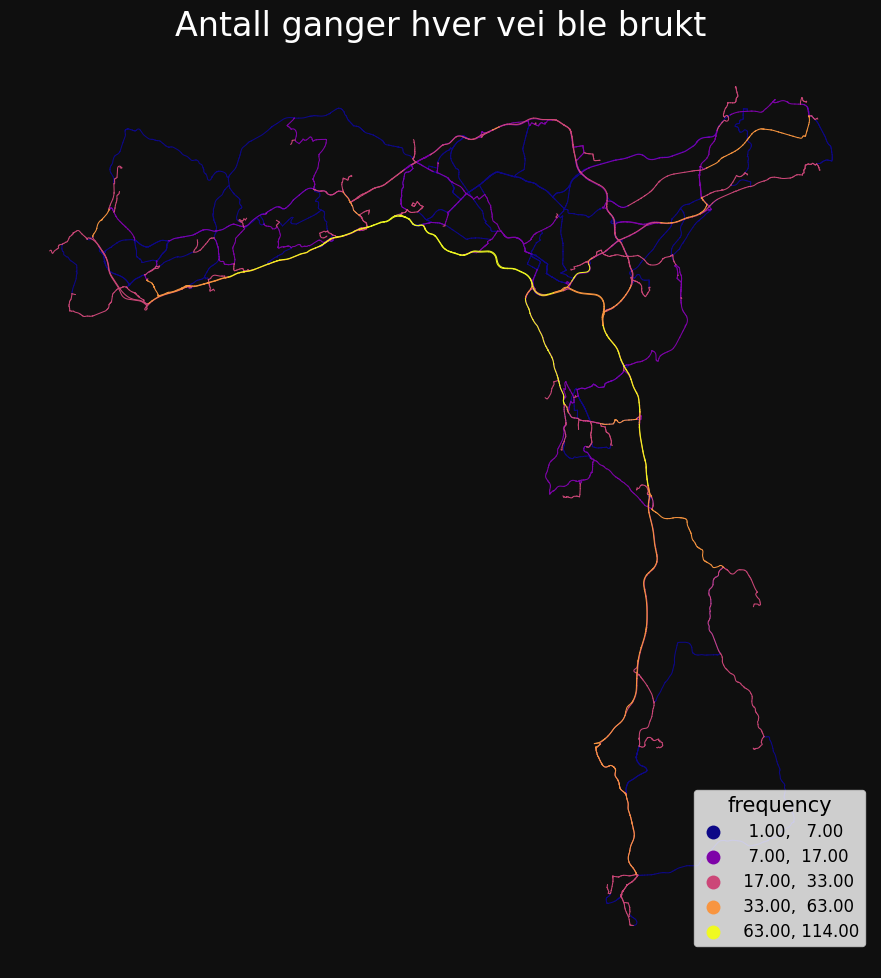

,KOMMUNENR,connected,drivetime_bw,drivetime_fw,idx_orig,meters,minutes,frequency,n_source,n_target,oneway,roadid,source,source_wkt,target,target_wkt,geometry
196425,0301,1.0,-1.0,NaN,1512666,198.527227,0.195691,114.0,3,3,FT,{E6},97139,POINT (263609.0999999996 6647817.4),91243,POINT (263418.2000000002 6647762.9),"LINESTRING Z (263609.100 6647817.400 15.058, 2..."
196932,0301,1.0,-1.0,NaN,1516218,0.997230,0.000860,113.0,2,2,FT,{E18},97545,POINT (257762.0750000002 6650271.945),97546,POINT (257761.08299999963 6650271.843),"LINESTRING Z (257762.075 6650271.945 3.565, 25..."
196929,0301,1.0,-1.0,NaN,1516194,351.672338,0.303317,113.0,3,2,FT,{E18},97542,POINT (258132.7000000002 6650468.199999999),97543,POINT (257835.46899999958 6650285.132999999),"LINESTRING Z (258132.700 6650468.200 3.455, 25..."


In [10]:
frequencies = nwa.get_route_frequencies(origins.sample(25), destinations.sample(25))

sg.qtm(
    sg.buff(frequencies, 18),
    "frequency",
    scheme="naturalbreaks",
    cmap="plasma",
    title="Antall ganger hver vei ble brukt",
    size=12,
)

frequencies.nlargest(3, "frequency")

### Reisetider: OD Cost Matrix

In [11]:
od = nwa.od_cost_matrix(
    origins,
    destinations,
)
od

,origin,destination,minutes
0,0,1000,18.286251
1,0,1001,23.914907
2,0,1002,25.349398
3,0,1003,29.638687
4,0,1004,37.473410
...,...,...,...
999995,999,1995,14.876731
999996,999,1996,40.604329
999997,999,1997,37.069576
999998,999,1998,31.411586


Kolonnene 'origin' og 'destination' bruker index-en til inputene.

Man kan derfor enkelt koble resultatene med input-dataene:

In [12]:
origins_joinet = origins.join(od.set_index("origin"))
origins_joinet

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar,destination,minutes
0,0301,111,99.0,19320101,POINT (258151.000 6648532.000),1932,1000,18.286251
0,0301,111,99.0,19320101,POINT (258151.000 6648532.000),1932,1001,23.914907
0,0301,111,99.0,19320101,POINT (258151.000 6648532.000),1932,1002,25.349398
0,0301,111,99.0,19320101,POINT (258151.000 6648532.000),1932,1003,29.638687
0,0301,111,99.0,19320101,POINT (258151.000 6648532.000),1932,1004,37.473410
...,...,...,...,...,...,...,...,...
999,3020,121,97.5,20191108,POINT (264073.000 6634630.000),2019,1995,14.876731
999,3020,121,97.5,20191108,POINT (264073.000 6634630.000),2019,1996,40.604329
999,3020,121,97.5,20191108,POINT (264073.000 6634630.000),2019,1997,37.069576
999,3020,121,97.5,20191108,POINT (264073.000 6634630.000),2019,1998,31.411586


In [13]:
destinations_joinet = destinations.join(od.set_index("destination"))
destinations_joinet

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar,origin,minutes
1000,0301,239,107.0,,POINT (266563.000 6652294.000),0,0,18.286251
1000,0301,239,107.0,,POINT (266563.000 6652294.000),0,1,32.219489
1000,0301,239,107.0,,POINT (266563.000 6652294.000),0,2,33.643953
1000,0301,239,107.0,,POINT (266563.000 6652294.000),0,3,6.230638
1000,0301,239,107.0,,POINT (266563.000 6652294.000),0,4,18.104902
...,...,...,...,...,...,...,...,...
1999,3024,181,33.0,,POINT (249456.000 6650209.000),0,995,25.186847
1999,3024,181,33.0,,POINT (249456.000 6650209.000),0,996,37.674958
1999,3024,181,33.0,,POINT (249456.000 6650209.000),0,997,26.658093
1999,3024,181,33.0,,POINT (249456.000 6650209.000),0,998,15.442727


Eller gi punktene kolonner med aggregerte data:

In [14]:
origins["minutes_mean"] = od.groupby("origin").minutes.mean()
origins["minutes_max"] = od.groupby("origin").minutes.max()
origins

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar,minutes_mean,minutes_max
0,0301,111,99.0,19320101,POINT (258151.000 6648532.000),1932,19.060979,125.291349
1,3024,181,27.0,19720115,POINT (247601.000 6655047.000),1972,30.284593,137.694015
2,3024,111,70.0,20040602,POINT (247126.000 6655173.000),2004,31.696562,139.118479
3,0301,136,140.0,18620101,POINT (263724.000 6650522.000),1862,16.890262,121.440792
4,0301,181,29.0,20030508,POINT (256299.000 6654547.000),2003,21.877677,121.008427
...,...,...,...,...,...,...,...,...
995,0301,133,83.0,19520101,POINT (266061.000 6647861.000),1952,16.587696,125.971934
996,0301,181,36.0,20190611,POINT (265673.000 6660928.000),2019,30.794488,130.726605
997,0301,181,23.0,20080402,POINT (264881.000 6645863.000),2008,17.248319,127.273362
998,0301,181,2181.0,20060629,POINT (258626.000 6650755.000),2006,15.339044,120.063516


In [15]:
sg.explore(origins, "minutes_mean", scheme="quantiles")

Hvis man vil bruke en kolonne som id-er heller enn index-en, kan man sette index-en inni funksjonen:

In [16]:
od = nwa.od_cost_matrix(
    origins.set_index("KOMMUNENR"),
    destinations,
)

od

,origin,destination,minutes
0,0301,1000,18.286251
1,0301,1001,23.914907
2,0301,1002,25.349398
3,0301,1003,29.638687
4,0301,1004,37.473410
...,...,...,...
999995,3020,1995,14.876731
999996,3020,1996,40.604329
999997,3020,1997,37.069576
999998,3020,1998,31.411586


In [17]:
od.groupby("origin").mean()

,destination,minutes
origin,,
0301,1499.5,19.560907
3020,1499.5,29.120353
3024,1499.5,22.456318


Med lines=True får man rette linjer, så man lettere kan undersøke resultatene.

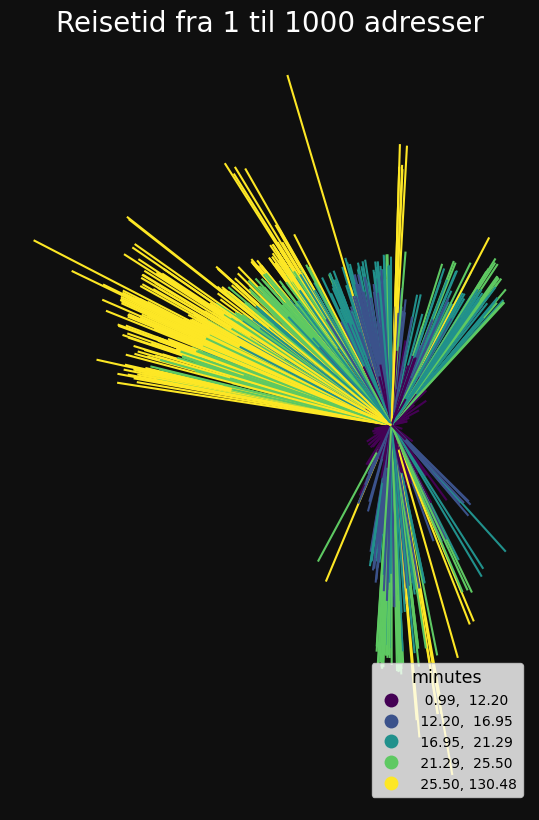

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Reisetid fra 1 til 1000 adresser'}>)

In [18]:
od = nwa.od_cost_matrix(
    origins.sample(1),
    destinations,
    lines=True
)

sg.qtm(od, "minutes", title="Reisetid fra 1 til 1000 adresser", scheme="quantiles")

## Finn raskeste rute

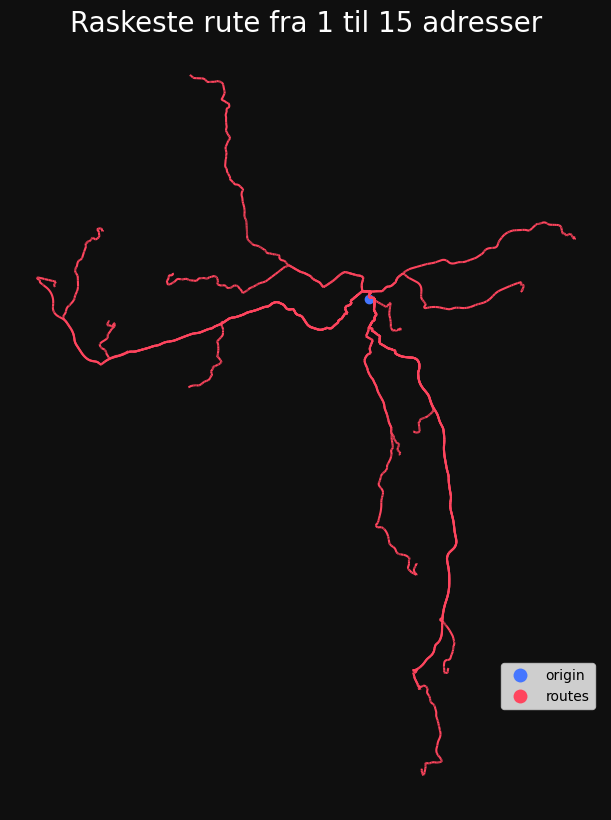

,origin,destination,minutes,geometry
0,2470929,1641,29.060244,MULTILINESTRING Z ((254036.320 6661715.390 179...
1,2470929,1779,28.328355,MULTILINESTRING Z ((261352.158 6649521.080 6.6...
2,2470929,1415,23.951294,MULTILINESTRING Z ((265179.100 6637420.500 157...
3,2470929,1031,33.502628,MULTILINESTRING Z ((265162.000 6632172.500 86....
4,2470929,1921,24.421625,MULTILINESTRING Z ((246510.702 6651602.121 56....
5,2470929,1937,16.625723,MULTILINESTRING Z ((262860.400 6650873.440 32....
6,2470929,1242,14.925370,MULTILINESTRING Z ((263438.900 6648446.900 18....
7,2470929,1208,7.634602,MULTILINESTRING Z ((264407.670 6649204.015 56....
8,2470929,1849,21.992590,MULTILINESTRING Z ((253909.800 6651611.300 92....
9,2470929,1055,23.199092,MULTILINESTRING Z ((249757.927 6648142.155 3.9...


In [19]:
origin = bygg.loc[[2_470_929]]

routes = nwa.get_route(
    origin,
    destinations.sample(15),
)

sg.qtm(origin, routes, title="Raskeste rute fra 1 til 15 adresser")

routes

### Service area

,minutes,geometry
0,1,MULTILINESTRING Z ((262850.023 6650817.997 30....
1,2,MULTILINESTRING Z ((263052.902 6651086.944 38....
2,3,MULTILINESTRING Z ((262834.800 6651311.300 48....
3,4,MULTILINESTRING Z ((262750.930 6651840.320 63....
4,5,MULTILINESTRING Z ((261699.300 6650469.800 37....
5,6,MULTILINESTRING Z ((264990.250 6650276.370 76....
6,7,MULTILINESTRING Z ((265262.829 6650519.242 78....
7,8,MULTILINESTRING Z ((264348.673 6648271.134 17....
8,9,MULTILINESTRING Z ((266909.769 6651075.250 114...
9,10,MULTILINESTRING Z ((263448.780 6645754.660 7.3...


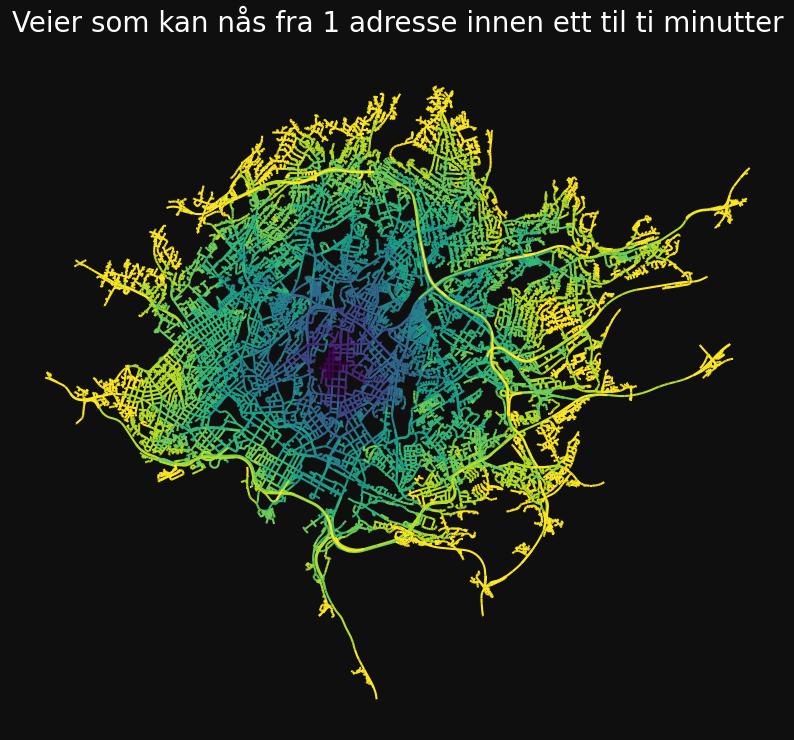

In [20]:
service_areas = nwa.service_area(
    origin,
    breaks=np.arange(1, 11),
)

sg.qtm(service_areas, "minutes", k=10, title="Veier som kan nås fra 1 adresse innen ett til ti minutter", legend=False)

service_areas

Sjekk loggen:

In [21]:
nwa.log

,endtime,minutes_elapsed,method,origins_count,destinations_count,percent_missing,cost_mean,isolated_removed,percent_bidirectional,weight,...,nodedist_multiplier,nodedist_kmh,cost_p25,cost_median,cost_p75,cost_std,lines,rowwise,breaks,dissolve
0,2023-03-30 09:18:38,0.6,get_route_frequencies,25,25.0,0.0000,0.072128,True,85,minutes,...,None,None,0.011319,0.035925,0.088665,0.105237,NaN,NaN,NaN,NaN
1,2023-03-30 09:19:36,0.9,od_cost_matrix,1000,1000.0,2.9779,21.715318,True,85,minutes,...,None,None,14.013461,20.596986,28.129004,10.602725,False,False,NaN,NaN
2,2023-03-30 09:20:31,0.9,od_cost_matrix,1000,1000.0,2.9779,21.715318,True,85,minutes,...,None,None,14.013461,20.596986,28.129004,10.602725,False,False,NaN,NaN
3,2023-03-30 09:20:41,0.2,od_cost_matrix,1,1000.0,1.3000,18.934553,True,85,minutes,...,None,None,13.872959,19.100965,24.239227,8.380752,True,False,NaN,NaN
4,2023-03-30 09:20:56,0.2,get_route,1,15.0,0.0000,21.387870,True,85,minutes,...,None,None,15.822849,23.199092,24.897377,6.923892,NaN,False,NaN,NaN
5,2023-03-30 09:21:05,0.1,service_area,1,NaN,0.0000,5.500000,True,85,minutes,...,None,None,3.250000,5.500000,7.750000,3.027650,NaN,NaN,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10",True


## Finn raskeste k ruter
k = antall

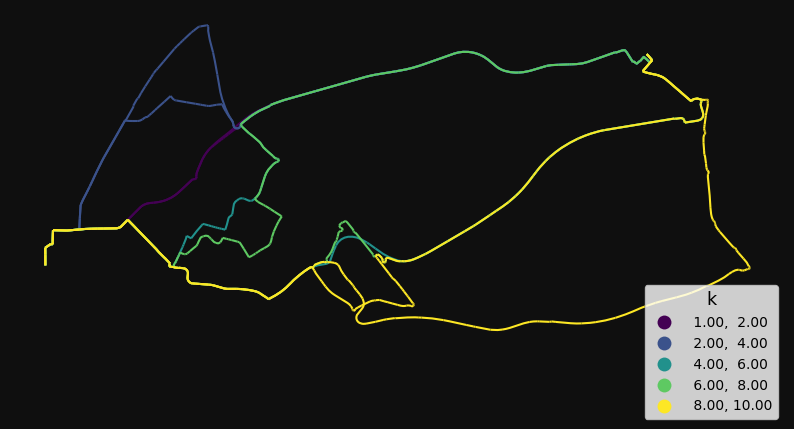

,origin,destination,minutes,k,geometry
0,2470929,2538349,8.977744,1,MULTILINESTRING Z ((268199.200 6652524.500 148...
1,2470929,2538349,9.019577,2,MULTILINESTRING Z ((268199.200 6652524.500 148...
2,2470929,2538349,10.702815,3,MULTILINESTRING Z ((268199.200 6652524.500 148...
3,2470929,2538349,11.393830,4,MULTILINESTRING Z ((268199.200 6652524.500 148...
4,2470929,2538349,11.659811,5,MULTILINESTRING Z ((264854.200 6651595.600 126...
5,2470929,2538349,12.295612,6,MULTILINESTRING Z ((268199.200 6652524.500 148...
6,2470929,2538349,12.971575,7,MULTILINESTRING Z ((265431.010 6650971.850 94....
7,2470929,2538349,13.700938,8,MULTILINESTRING Z ((264052.396 6650829.193 53....
8,2470929,2538349,13.920801,9,MULTILINESTRING Z ((268656.950 6651694.641 118...
9,2470929,2538349,14.068021,10,MULTILINESTRING Z ((265226.515 6650674.617 88....


In [22]:
p1, p2 = bygg.loc[[2_470_929]], bygg.loc[[2_538_349]]

k_routes = nwa.get_k_routes(p1, p2, k=10, drop_middle_percent=1)

sg.qtm(k_routes, "k")

k_routes

Men kan stille strengere krav til hvor ulike rutene skal være. 

Med drop_middle_percent=50, fjernes midteste halvdel av ruta fra nettverket (midlertidig) før neste rute skal finnes.

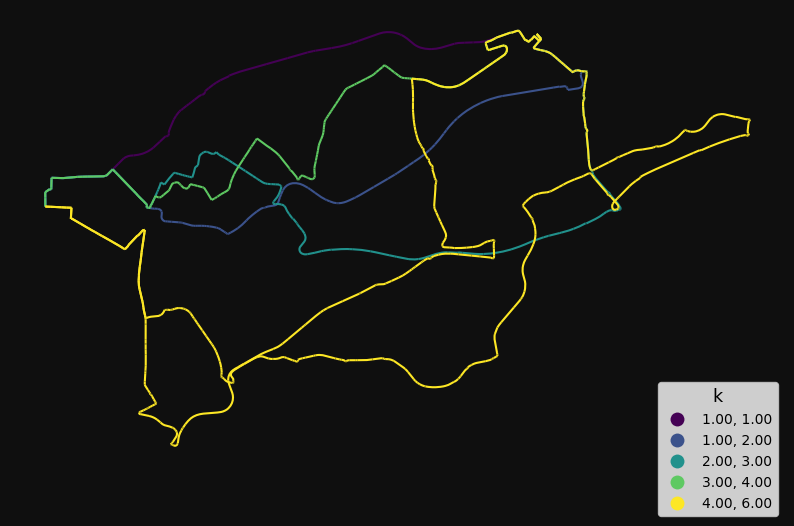

,origin,destination,minutes,k,geometry
0,2470929,2538349,8.977744,1,MULTILINESTRING Z ((268199.200 6652524.500 148...
1,2470929,2538349,12.295612,2,MULTILINESTRING Z ((268199.200 6652524.500 148...
2,2470929,2538349,15.386203,3,MULTILINESTRING Z ((265313.000 6650960.400 97....
3,2470929,2538349,17.419792,4,MULTILINESTRING Z ((264052.396 6650829.193 53....
4,2470929,2538349,19.936433,5,MULTILINESTRING Z ((268199.200 6652524.500 148...
5,2470929,2538349,25.519504,6,MULTILINESTRING Z ((268656.950 6651694.641 118...


In [23]:
k_routes = nwa.get_k_routes(p1, p2, k=10, drop_middle_percent=50)

sg.qtm(k_routes, "k")

k_routes

Her fant man bare seks ulike ruter. Med drop_middle_percent=100, finner man bare én rute:

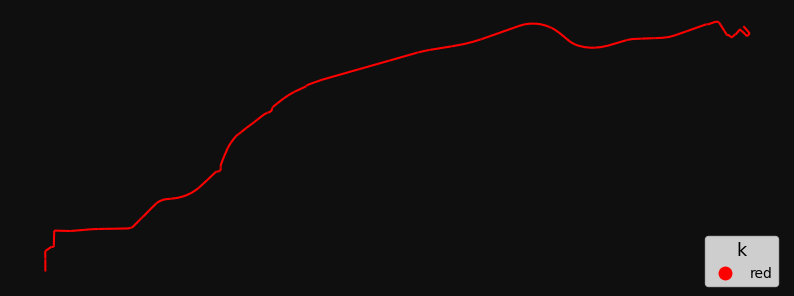

,origin,destination,minutes,k,geometry
0,2470929,2538349,8.977744,1,MULTILINESTRING Z ((268199.200 6652524.500 148...


In [24]:
k_routes = nwa.get_k_routes(p1, p2, k=10, drop_middle_percent=100)

sg.qtm(k_routes, "k", color="red")

k_routes

Sjekk loggen

In [25]:
nwa.log

,endtime,minutes_elapsed,method,origins_count,destinations_count,percent_missing,cost_mean,isolated_removed,percent_bidirectional,weight,...,nodedist_multiplier,nodedist_kmh,cost_p25,cost_median,cost_p75,cost_std,lines,rowwise,breaks,dissolve
0,2023-03-30 09:18:38,0.6,get_route_frequencies,25,25.0,0.0000,0.072128,True,85,minutes,...,None,None,0.011319,0.035925,0.088665,0.105237,NaN,NaN,NaN,NaN
1,2023-03-30 09:19:36,0.9,od_cost_matrix,1000,1000.0,2.9779,21.715318,True,85,minutes,...,None,None,14.013461,20.596986,28.129004,10.602725,False,False,NaN,NaN
2,2023-03-30 09:20:31,0.9,od_cost_matrix,1000,1000.0,2.9779,21.715318,True,85,minutes,...,None,None,14.013461,20.596986,28.129004,10.602725,False,False,NaN,NaN
3,2023-03-30 09:20:41,0.2,od_cost_matrix,1,1000.0,1.3000,18.934553,True,85,minutes,...,None,None,13.872959,19.100965,24.239227,8.380752,True,False,NaN,NaN
4,2023-03-30 09:20:56,0.2,get_route,1,15.0,0.0000,21.387870,True,85,minutes,...,None,None,15.822849,23.199092,24.897377,6.923892,NaN,False,NaN,NaN
5,2023-03-30 09:21:05,0.1,service_area,1,NaN,0.0000,5.500000,True,85,minutes,...,None,None,3.250000,5.500000,7.750000,3.027650,NaN,NaN,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10",True
6,2023-03-30 09:21:21,0.2,get_k_routes,1,1.0,0.0000,11.871072,True,85,minutes,...,None,None,10.875569,11.977712,13.518597,1.882885,NaN,False,NaN,NaN
7,2023-03-30 09:21:32,0.2,get_k_routes,1,1.0,0.0000,16.589215,True,85,minutes,...,None,None,13.068260,16.402997,19.307273,5.821693,NaN,False,NaN,NaN
8,2023-03-30 09:21:41,0.1,get_k_routes,1,1.0,0.0000,8.977744,True,85,minutes,...,None,None,8.977744,8.977744,8.977744,NaN,NaN,False,NaN,NaN
